In [1]:
import pandas as pd
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df.to_csv("D:/classes/Superstore_utf8.csv", encoding='utf-8', index=False)

In [3]:
df = pd.read_csv("Superstore_utf8.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

<Axes: >

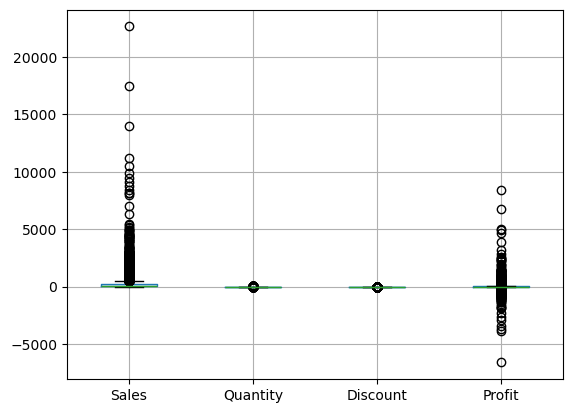

In [8]:
cols = ['Sales','Quantity','Discount','Profit'] 
df[cols].boxplot()

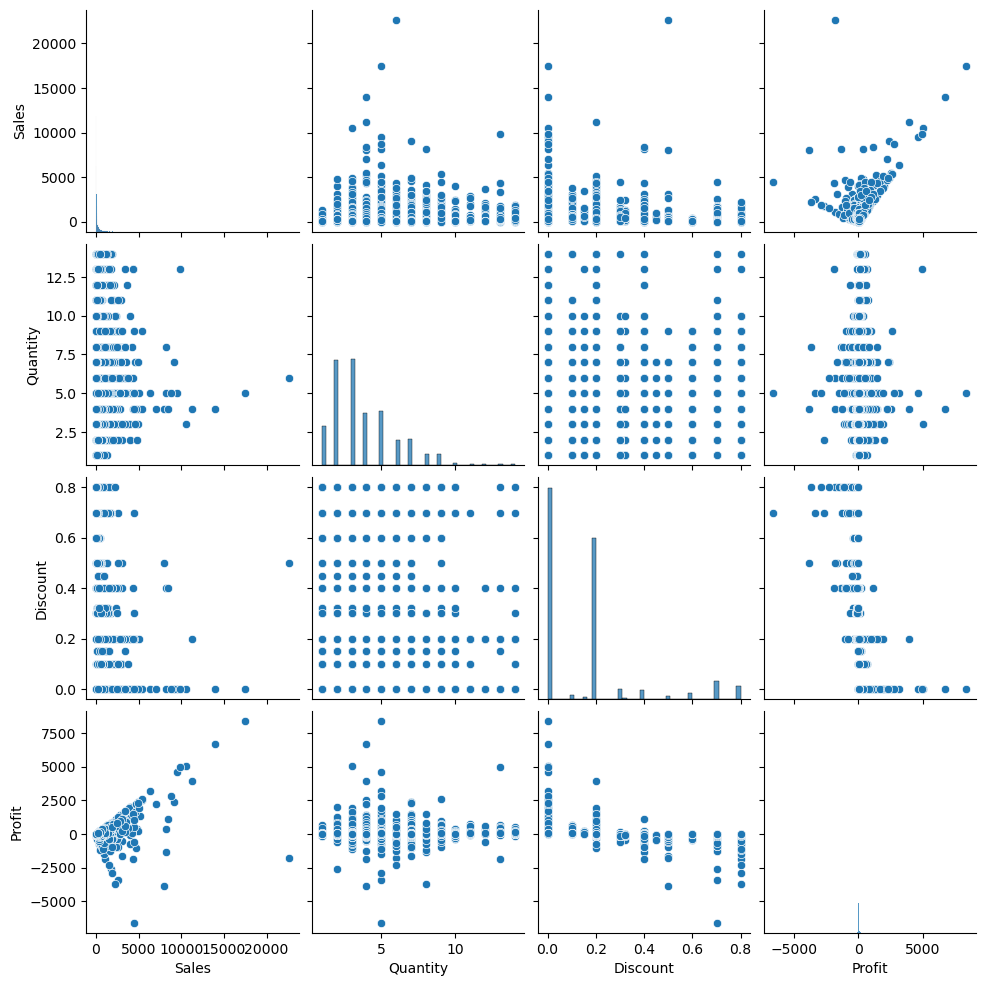

In [9]:

cols = ['Sales', 'Quantity', 'Discount', 'Profit']
plot = sns.pairplot(df[cols])
plt.show()


### Graph 
     -Sales aur Profit: points ek line ke jaisa upar ja rahe hain → positive relation
     -Discount aur Profit: points neeche ki taraf jate dikh rahe hain → negative relation
     -Quantity aur Profit: zyada clear nahi hai → weak relation
     -Discount aur Sales: thoda weak ya mixed relation

In [11]:
Q1 = df['Sales'].quantile(0.25) 
Q3 = df['Sales'].quantile(0.75) 
IQR = Q3 - Q1                        
lower = Q1 - 1.5 * IQR               
upper = Q3 + 1.5 * IQR       

outliers = df[(df['Sales'] < lower) | (df['Sales'] > upper)]  
print("Outliers in Profit:", len(outliers))


Outliers in Profit: 1167


In [12]:
df = df[(df['Sales'] >= lower) & (df['Sales'] <= upper)]
df.shape

(8827, 21)

In [13]:
for col in ['Profit', 'Discount', 'Quantity']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
df.shape

(6706, 21)

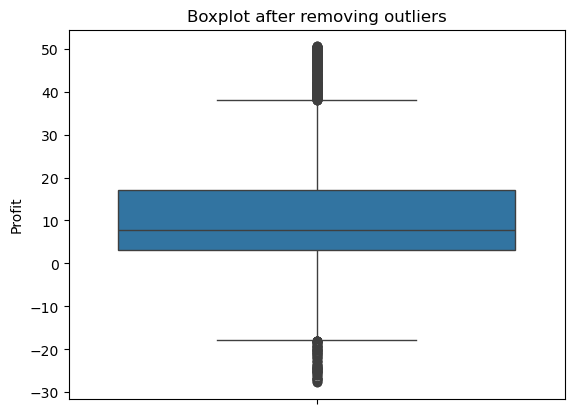

In [14]:
sns.boxplot(y=df['Profit'])
plt.title('Boxplot after removing outliers')
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6706 entries, 0 to 9992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         6706 non-null   int64  
 1   Order ID       6706 non-null   object 
 2   Order Date     6706 non-null   object 
 3   Ship Date      6706 non-null   object 
 4   Ship Mode      6706 non-null   object 
 5   Customer ID    6706 non-null   object 
 6   Customer Name  6706 non-null   object 
 7   Segment        6706 non-null   object 
 8   Country        6706 non-null   object 
 9   City           6706 non-null   object 
 10  State          6706 non-null   object 
 11  Postal Code    6706 non-null   int64  
 12  Region         6706 non-null   object 
 13  Product ID     6706 non-null   object 
 14  Category       6706 non-null   object 
 15  Sub-Category   6706 non-null   object 
 16  Product Name   6706 non-null   object 
 17  Sales          6706 non-null   float64
 18  Quantity     

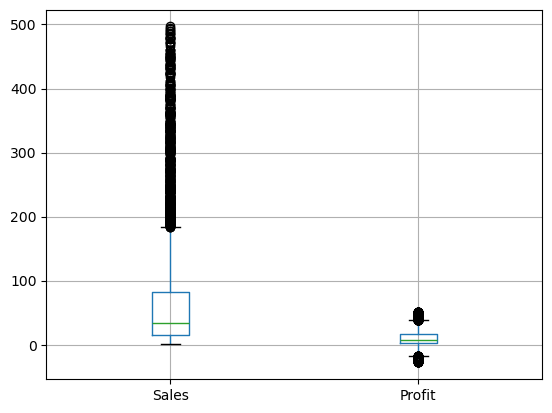

In [16]:
cols = ['Sales', 'Profit']
df[cols].boxplot()
plt.show()

In [52]:
corr = df.corr(numeric_only=True)
corr

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.016485,0.011940,0.001945,0.003499,0.002618
Postal Code,0.016485,1.000000,0.068579,0.013632,0.067147,0.006059
Sales,0.011940,0.068579,1.000000,0.113521,0.149692,0.368504
Quantity,0.001945,0.013632,0.113521,1.000000,-0.023467,0.237194
Discount,0.003499,0.067147,0.149692,-0.023467,1.000000,-0.283406
Profit,0.002618,0.006059,0.368504,0.237194,-0.283406,1.000000


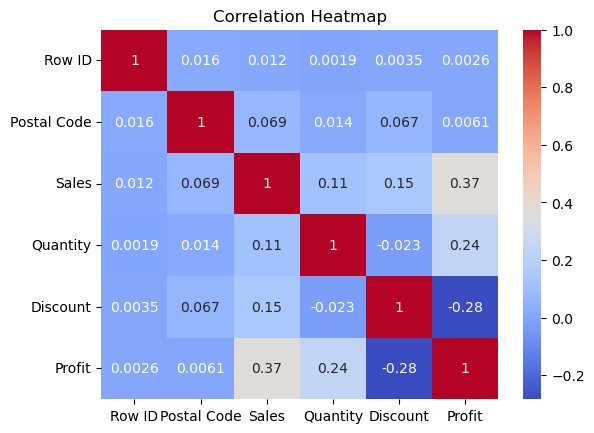

In [62]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Is analysis ka maqsad Superstore ke sales data ko explore karna tha aur dekhna tha ke kaun se factors profit ko affect karte hain. Data ko clean karne ke liye missing values aur outliers ko handle kiya gaya (IQR method use karke).

Data cleaning ke baad dataset zyada reliable aur accurate ho gaya. Analysis se yeh samajh aaya ke kuch product categories aur regions zyada profit deti hain jab ke kuch low-profit ya loss show karte hain. “Sales” aur “Profit” columns me thoda right skewness bhi dekha gaya.

Outliers remove karne ke baad data ka spread better ho gaya aur extreme values ka effect kam ho gaya. Ab yeh clean dataset future modeling aur business decision-making ke liye ready hai.

Business recommendation:
Discount policies ko optimize karna aur high-profit categories par focus karna revenue badha sakta hai.